In [2]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [3]:
import numpy as np

In [4]:
fish_data = np.column_stack((fish_length, fish_weight))

In [5]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [6]:
from sklearn.model_selection import train_test_split # 훈련세트와 테스트 테스트를 적절하게 섞어서 만들어주는 함수

In [7]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target)

In [8]:
print(test_target)

[1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1.]


In [9]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target)

In [10]:
print(test_target)

[1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0.]


In [12]:
# 학습
from sklearn.neighbors import KNeighborsClassifier

In [11]:
kn = KNeighborsClassifier()

In [13]:
# 훈련 fit
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [14]:
# 정확도 확인 - 테스트 세트
kn.score(test_input, test_target)

1.0

In [15]:
# 도미 - 길이 25cm, 무게 150g 
kn.predict([[25, 150]])

array([0.])

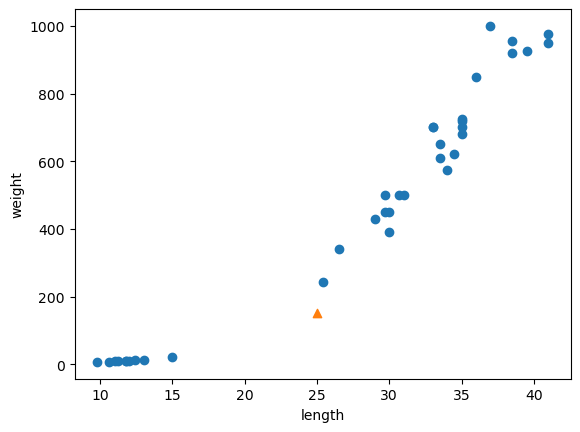

In [16]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [18]:
# 측정 수치 [25, 150] 최근접 이웃 5개 kneighbors
distances, indexes = kn.kneighbors([[25, 150]])

In [21]:
# print(indexes)
train_target[indexes]

array([[1., 0., 0., 0., 0.]])

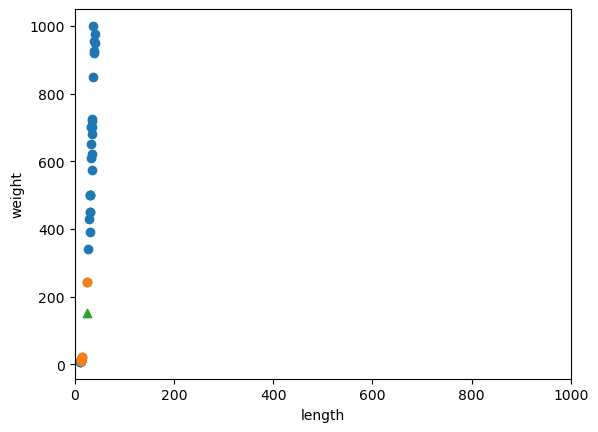

In [23]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(train_input[indexes, 0], train_input[indexes, 1])
plt.scatter(25, 150, marker='^')
plt.xlim(0, 1000)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [26]:
# 평균
mean = np.mean(train_input, axis=0)

#표준 편차
std = np.std(train_input, axis=0)


[ 10.3793331  339.87099963]


In [28]:
# 표준 점수로 훈련 세트 전처리
train_scaled = (train_input - mean) /std
print(train_scaled)

[[ 1.29102707  1.39224392]
 [-1.21395083 -1.34438263]
 [-1.40664143 -1.36703828]
 [ 0.20232514  0.06821216]
 [-1.71494641 -1.38322089]
 [ 0.56843729  0.50955608]
 [ 0.32757403  0.06821216]
 [ 1.05016381  1.40695539]
 [ 0.90564586  1.53935856]
 [ 0.6647826   0.42128729]
 [ 0.61660994  0.28888412]
 [-1.5222558  -1.37380555]
 [ 0.29867044  0.06821216]
 [-1.46444862 -1.36350753]
 [ 0.71295525  0.65667072]
 [-1.50298674 -1.37409978]
 [ 0.71295525  0.59782486]
 [-0.10597983 -0.4025547 ]
 [ 0.71295525  0.73022804]
 [ 0.13488343 -0.13774834]
 [-1.59933204 -1.37439401]
 [ 0.56843729  0.39186436]
 [-1.58006298 -1.37409978]
 [ 0.71295525  0.71551657]
 [-1.5222558  -1.37351132]
 [ 0.80930055  1.09801464]
 [ 0.20232514 -0.07890249]
 [ 0.52026464  0.65667072]
 [ 1.14650911  1.3186866 ]
 [ 0.52026464  0.65667072]
 [ 1.05016381  1.30397514]
 [ 0.23122873 -0.07890249]
 [ 1.29102707  1.46580124]
 [-0.21195967 -0.69089939]
 [ 0.23122873 -0.25544005]
 [-1.63787016 -1.3823382 ]]


In [34]:
new = (np.array([25,150]) - mean) / std
print(new)

[-0.25049779 -0.96159033]


In [36]:
test_scaled = (test_input - mean) /std

In [37]:
kn.fit(train_scaled, train_target)
kn.score(train_scaled, train_target)

1.0

In [38]:
kn.predict([new])

array([1.])

In [39]:
distances, indexes = kn.kneighbors([new])
print(indexes)

[[33 17 34 19 26]]


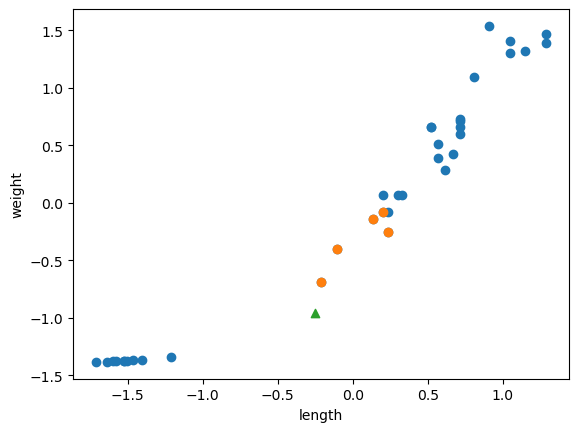

In [40]:
plt.scatter(train_scaled[:, 0],train_scaled[:, 1])
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1])
# plt.scatter(25, 150, marker='^')
plt.scatter(new[0], new[1], marker='^')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [42]:
from sklearn.preprocessing  import StandardScaler

In [43]:
ss = StandardScaler() #fit, transform - 표준점수 변환


In [44]:
ss.fit(fish_data)

StandardScaler()

In [47]:
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [48]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [49]:
kn.score(test_scaled, test_target)

1.0

In [50]:
kn.predict([new])

array([1.])